In [4]:
import pandas as pd

# Read the first few rows of the uploaded CSV file
data_c30 = pd.read_csv("data_c30.csv")
data_c30.head()

# Read the first few rows of the lane data CSV file
lane_data_c = pd.read_csv("lane_data_c.csv")
lane_data_c.head()

# Merge the two datasets based on the 'Distance' column
merged_data = pd.merge(data_c30, lane_data_c, on="Distance")

# Filter the data for the specified Distance range (2500 to 3000)
filtered_data = merged_data[
    (merged_data["Distance"] >= 2500) & (merged_data["Distance"] <= 3000)
]

filtered_data.head()

from sklearn.model_selection import train_test_split

# Define the target columns (derailment coefficients)
target_cols = ["YL_M1_B1_W1", "YR_M1_B1_W1", "YL_M1_B1_W2", "YR_M1_B1_W2"]

# Define the features columns
features_cols = [
    col for col in filtered_data.columns if col not in ["Distance"] + target_cols
]

# Split the data into training and test sets
train_data, test_data = train_test_split(filtered_data, test_size=0.2, shuffle=False)

# Define the training features and targets
X_train = train_data[features_cols].values
y_train = train_data[target_cols].values

# Define the test features and targets
X_test = test_data[features_cols].values
y_test = test_data[target_cols].values

X_train.shape, y_train.shape, X_test.shape, y_test.shape

import numpy as np


def create_sequences(data, target, input_sequence_length, target_sequence_length):
    """
    Create sequences of input data and corresponding target data.
    """
    input_sequences = []
    target_sequences = []

    for i in range(len(data) - input_sequence_length - target_sequence_length + 1):
        input_sequences.append(data[i : i + input_sequence_length])
        target_sequences.append(
            target[
                i
                + input_sequence_length : i
                + input_sequence_length
                + target_sequence_length
            ]
        )

    return np.array(input_sequences), np.array(target_sequences)


# Define the input sequence and target sequence lengths
input_sequence_length = 10  # Use 10 timesteps for input
target_sequence_length = 1  # Predict 1 timestep ahead

# Create sequences for training data
X_train_seq, y_train_seq = create_sequences(
    X_train, y_train, input_sequence_length, target_sequence_length
)

# Create sequences for test data
X_test_seq, y_test_seq = create_sequences(
    X_test, y_test, input_sequence_length, target_sequence_length
)

X_train_seq.shape, y_train_seq.shape, X_test_seq.shape, y_test_seq.shape

import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model


def transformer_model(input_shape, target_shape):
    """
    Define the transformer model for time series forecasting.
    """
    # Input layer
    inputs = Input(shape=input_shape)

    # Multi-head attention layer
    attention_output = MultiHeadAttention(num_heads=8, key_dim=input_shape[-1])(
        [inputs, inputs]
    )

    # Add & Normalize layer
    attention_output = tf.keras.layers.Add()([inputs, attention_output])
    attention_output = tf.keras.layers.LayerNormalization(epsilon=1e-6)(
        attention_output
    )

    # Feed-forward layer
    ff_output = tf.keras.layers.Dense(units=input_shape[-1], activation="relu")(
        attention_output
    )
    ff_output = tf.keras.layers.Dense(units=input_shape[-1])(ff_output)

    # Add & Normalize layer
    ff_output = tf.keras.layers.Add()([attention_output, ff_output])
    ff_output = tf.keras.layers.LayerNormalization(epsilon=1e-6)(ff_output)

    # Output layer
    outputs = Dense(target_shape[-1])(ff_output)

    # Compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

    return model


# Define the transformer model
model = transformer_model(
    (input_sequence_length, X_train_seq.shape[-1]),
    (target_sequence_length, y_train_seq.shape[-1]),
)

# Train the model
history = model.fit(
    X_train_seq,
    y_train_seq,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
)

# Predict on test data
predictions = model.predict(X_test_seq)

2.13.0


NameError: name 'MultiHeadAttention' is not defined

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32, 1, 4])) that is different to the input size (torch.Size([32, 10, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([18, 1, 4])) that is different to the input size (torch.Size([18, 10, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10, Loss: 0.011711838655173779
Epoch 2/10, Loss: 0.007750817108899355
Epoch 3/10, Loss: 0.003451406257227063
Epoch 4/10, Loss: 0.0018441417487338185
Epoch 5/10, Loss: 0.0010986748384311795
Epoch 6/10, Loss: 0.0007123405812308192
Epoch 7/10, Loss: 0.0004855919978581369
Epoch 8/10, Loss: 0.0004024642985314131
Epoch 9/10, Loss: 0.0003669571888167411
Epoch 10/10, Loss: 0.00042309306445531547


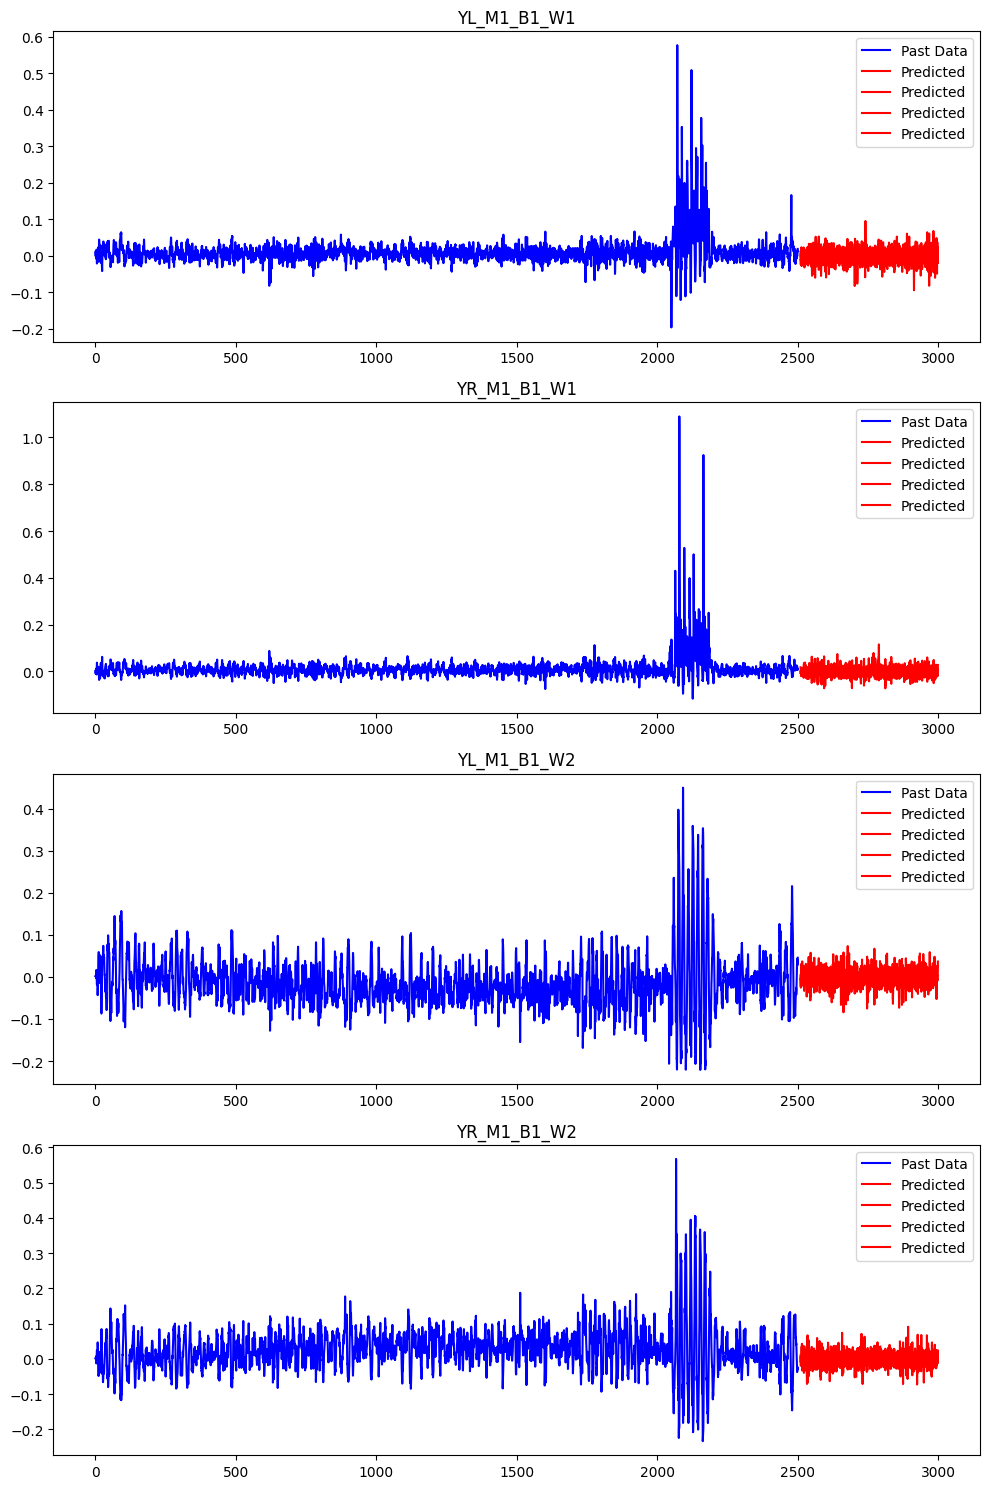

In [2]:
import pandas as pd

# Read the first few rows of the uploaded CSV file
data_c30 = pd.read_csv("data_c30.csv")
data_c30.head()

# Read the first few rows of the lane data CSV file
lane_data_c = pd.read_csv("lane_data_c.csv")
lane_data_c.head()

# Merge the two datasets based on the 'Distance' column
merged_data = pd.merge(data_c30, lane_data_c, on="Distance")

# Filter the data for the specified Distance range (0 to 2500)
filtered_data = merged_data[
    (merged_data["Distance"] >= 2500) & (merged_data["Distance"] <= 3000)
]
filtered_data.head()

from sklearn.model_selection import train_test_split

# Define the target columns (derailment coefficients)
target_cols = ["YL_M1_B1_W1", "YR_M1_B1_W1", "YL_M1_B1_W2", "YR_M1_B1_W2"]

# Define the features columns
features_cols = [
    col for col in filtered_data.columns if col not in ["Distance"] + target_cols
]

# Split the data into training and test sets
train_data, test_data = train_test_split(filtered_data, test_size=0.25, shuffle=False)

# Define the training features and targets
X_train = train_data[features_cols].values
y_train = train_data[target_cols].values

# Define the test features and targets
X_test = test_data[features_cols].values
y_test = test_data[target_cols].values

X_train.shape, y_train.shape, X_test.shape, y_test.shape

import numpy as np


def create_sequences(data, target, input_sequence_length, target_sequence_length):
    """
    Create sequences of input data and corresponding target data.
    """
    input_sequences = []
    target_sequences = []

    for i in range(len(data) - input_sequence_length - target_sequence_length + 1):
        input_sequences.append(data[i : i + input_sequence_length])
        target_sequences.append(
            target[
                i
                + input_sequence_length : i
                + input_sequence_length
                + target_sequence_length
            ]
        )

    return np.array(input_sequences), np.array(target_sequences)


# Define the input sequence and target sequence lengths
input_sequence_length = 10  # Use 10 timesteps for input
target_sequence_length = 1  # Predict 1 timestep ahead

# Create sequences for training data
X_train_seq, y_train_seq = create_sequences(
    X_train, y_train, input_sequence_length, target_sequence_length
)

# Create sequences for test data
X_test_seq, y_test_seq = create_sequences(
    X_test, y_test, input_sequence_length, target_sequence_length
)

X_train_seq.shape, y_train_seq.shape, X_test_seq.shape, y_test_seq.shape

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


# Define the Transformer model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, nhead, num_encoder_layers):
        super(TransformerModel, self).__init__()
        self.encoder = nn.Linear(input_dim, d_model)
        self.transformer = nn.Transformer(d_model, nhead, num_encoder_layers)
        self.decoder = nn.Linear(d_model, output_dim)

    def forward(self, src):
        src = self.encoder(src)
        output = self.transformer(src, src)
        return self.decoder(output)


# Hyperparameters
d_model = 64
nhead = 8
num_encoder_layers = 3
input_dim = X_train_seq.shape[-1]
output_dim = y_train_seq.shape[-1]

# Create the model
model = TransformerModel(input_dim, output_dim, d_model, nhead, num_encoder_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
train_dataset = TensorDataset(
    torch.tensor(X_train_seq, dtype=torch.float32),
    torch.tensor(y_train_seq, dtype=torch.float32),
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
for epoch in range(10):  # Number of epochs
    for i, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}/{10}, Loss: {loss.item()}")

import matplotlib.pyplot as plt

# 0~2500 범위의 데이터 필터링
past_data = merged_data[
    (merged_data["Distance"] >= 0) & (merged_data["Distance"] <= 2500)
]

# 예측 데이터 생성
predicted = model(torch.tensor(X_test_seq, dtype=torch.float32)).detach().numpy()


# 시각화 함수 정의
def plot_predictions(past_data, predicted, target_cols):
    fig, axes = plt.subplots(nrows=len(target_cols), ncols=1, figsize=(10, 15))

    for i, col in enumerate(target_cols):
        # 과거 데이터 그리기
        axes[i].plot(
            past_data["Distance"], past_data[col], label="Past Data", color="blue"
        )

        # 예측한 데이터 시작점 계산
        start_point = int(past_data["Distance"].max()) + input_sequence_length
        end_point = start_point + len(predicted)
        predicted_distances = range(start_point, end_point)

        # 예측 데이터 그리기
        axes[i].plot(
            predicted_distances, predicted[:, i], label="Predicted", color="red"
        )
        axes[i].set_title(col)
        axes[i].legend()

    plt.tight_layout()
    plt.show()


# 그래프 그리기
plot_predictions(past_data, predicted, target_cols)